<a href="https://github.com/victoresende19" rel="some text">![Foo](https://certificadocursosonline.com/wp-content/uploads/2017/11/CURSO-DE-ADMINISTRA%C3%87%C3%83O-DE-EMPRESAS.jpg)</a>

<h2 style="text-align:center">Pivitin's Company - Relatório Bimestral<h2\>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende<h2\>
<p style="text-align:center;font-size:13px;">Autor</p>


## Sumário

    
- [1. Contexto](#1)<br>
    * [1.2 Problema 01 - Produtos](#12)<br>
    * [1.3 Problema 02 - Pedidos](#13)<br>
    
- [2. Problema 01](#2) <br>
    * [2.1 Dicionário de dados](#21)<br>
    * [2.2 Atividades mapeadas](#22)<br>
        + [2.2.1 Carregando os dados](#221)<br>
        + [2.2.2 Visualização dos dados](#222)<br>
        + [2.2.3 Dados Faltantes](#223)<br>
        + [2.2.4 Preenchimento dos dados](#224)<br>
    * [2.3 Modelagem](#23)<br>
        + [2.3.1 Tratamento de balanceamento de classes (SMOTE)](#231)<br>
        + [2.3.2 Random Forest Classifier](#232)<br>
    * [2.4 Conclusão](#24)<br>
    
- [3. Problema 02](#3) <br>
    * [3.1 Dicionário de dados](#31)<br>
    * [3.2 Atividades mapeadas](#32)<br>
        + [3.2.1 Carregando os dados](#321)<br>
        + [3.2.2 Visualização dos dados](#322)<br>
        + [3.2.3 Dados faltantes](#323)<br>
        + [3.2.4 Preenchimentos dos dados](#324)<br>
    * [3.3 Feature Engineering](#33)<br>
        + [3.3.1 Tempo de entrega (dias)](#331)<br>
        + [3.3.2 Distância entre vendedor e cliente (km)](#332)<br>
        + [3.3.3 Preço final do produto](#333)<br>
        + [3.3.4 One Hot Encoding](#334)<br>
    * [3.4 Modelagem](#34)<br>
        + [3.4.1 Normalização dos dados (StandardScaler)](#341)<br>
        + [3.4.2 Random Forest Regressor](#342)<br>
    * [3.5 Conclusão](#35)<br>

### Observação: 
Para uma melhor visualização, recomenda-se a utilização do software Jupyter Notebook do Anaconda para a visualização. Contém alguns textos em HTML/Markdown que podem não funcionar no Google Colab. 

## Contexto <a id="1"></a>
Para tornar a resolução proposta mais dinâmica, deu-se o nome da empresa como Pivitin's Company.<br>
A empresa Pivitin's Company é uma grande empresa de e-comerce. Dessa forma, a equipe de cientistas de dados foi convocada para verificar e encontrar soluções para os problemas abaixo.

### Problema 1 - Produtos <a id="12"></a>
Vendedores que anunciam produtos em seu site muitas vezes esquecem de preencher o campo "categoria". Foi solicitado que pelo menos **mais da metade** dos produtos (presentes na variável categoria) sejam preenchidos automaticamente pelo modelo. <br><br>
**Critério de aceite**<br>
Mais da metade dos produtos devem ser preditos e o modelo deve possuir uma acurácia de 70%.

### Problema 2 - Pedidos <a id="13"></a>
Será necessário criar uma nova funcionalidade para o site. Ou seja, no momento em
que uma compra for aprovada querem a implementação de um modelo do qual faça uma previsão de chegada, em dias,
do produto ao comprador. Eles não querem um R2 menor que 0,4 e assumem que nos dados
que passaram existem situações fora do comum, onde o tempo de entrega excedeu em muito
a política do site.<br><br>
**Critério de aceite**<br>
A medida R2 não pode ser menor que 0,4. Vale ressaltar que nos dados existentes ocorrem situações fora do comum, onde o tempo de entrega excedeu em muito a política do site.

In [1]:
#Carregando as bibliotecas
import warnings
warnings.simplefilter(action='ignore', category=Warning)

#Processamento de dados
import pandas as pd
import numpy as np
!pip install pyproj
from pyproj import Geod #distancia entre lat e long

#Graficos
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#Modelagem
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

## Problema 01 - Resolução <a id="2"></a>

Como dito anteriormente, a empresa Pivitin's Company precisará tratar dados faltantes dos quais foram apresentados. Para efetuar a população de dados válidos será utilizado um modelo de preenchimento dos dados. Posteriormente será criado um modelo para prever pelo menos mais da metade dos produtos. Portanto, abaixo estão mapeadas as atividades necessárias de acordo com o critério de aceite.

### Dicionário dos dados <a id="21"></a>

- <strong>category:</strong> categoria do produto <br>
- <strong>product_name_lenght:</strong> tamanho do nome do produto <br>
- <strong>product_description_lenght:</strong> tamanho da descrição do produto <br>
- <strong>product_photos_qty:</strong> quantidade de fotos do produto <br>
- <strong>product_weight_g:</strong> peso do produto em gramas <br>
- <strong>product_length_cm:</strong> comprimento do produto em centímetros <br>
- <strong>product_height_cm:</strong> altura do produto em centímetros <br>
- <strong>product_width_cm:</strong> largura do produto em centímetros


### Atividades Mapeadas <a id="22"></a>
- Coletar a base com os dados de pedidos citada
- Verificar dados faltantes
- Escolher o método ou modelo de tratamento dos dados
- O modelo escolhido deve possuir uma acurácia ao menos 70%

**Obs:** Foram disponibilzados duas planilhas com os dados, com as mesmas variáveis. A planilha de treino será utilizada para a criação e treinamento do modelo de preenchimento dos dados e previsão dos produtos. Já a planilha com dados de teste será utilizada para validar a acurácia do modelo.

### Carregando os dados<a id="221"></a>

In [2]:
#treino
produtos_train = pd.read_csv('data_products_train.csv')

#testes
produtos_teste = pd.read_csv('data_products_test.csv')

A primeira etapa dessa solução se inicia por meio de uma análise exploratória, visando entender como os dados presentes nas bases de treino e teste estão distribuídos e verificando alguns pontos de alerta.

In [3]:
#Informações gerais da base de dados - Treino
produtos_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    12000 non-null  object 
 1   product_name_lenght         11765 non-null  float64
 2   product_description_lenght  11776 non-null  float64
 3   product_photos_qty          11742 non-null  float64
 4   product_weight_g            11779 non-null  float64
 5   product_length_cm           11758 non-null  float64
 6   product_height_cm           11767 non-null  float64
 7   product_width_cm            11766 non-null  float64
dtypes: float64(7), object(1)
memory usage: 750.1+ KB


In [4]:
#Informações gerais da base de dados - Teste
produtos_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    3000 non-null   object 
 1   product_name_lenght         2942 non-null   float64
 2   product_description_lenght  2931 non-null   float64
 3   product_photos_qty          2945 non-null   float64
 4   product_weight_g            2945 non-null   float64
 5   product_length_cm           2940 non-null   float64
 6   product_height_cm           2949 non-null   float64
 7   product_width_cm            2948 non-null   float64
dtypes: float64(7), object(1)
memory usage: 187.6+ KB


### Visualização dos dados <a id="222"></a>

O primeiro gráfico tem como objetivo verificar a quantidade de cada produto presente na variável categoria. Tal visualização é demonstrada abaixo por meio de um gráfico de barras visando uma melhor visualização, uma vez que existem vários produtos. Percebe-se um desbalanceamento entre as classes.

Text(0.5, 1.0, 'Quantidade de produtos em categoria')

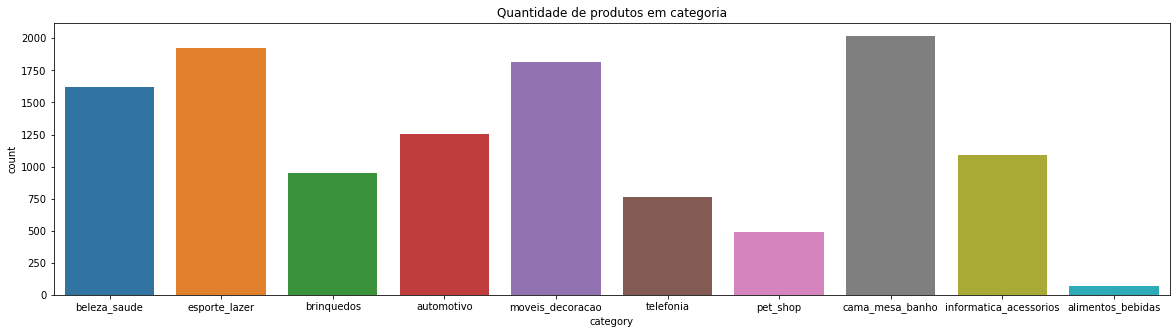

In [5]:
figure(figsize=(20,5))
sns.countplot(x ='category', data = produtos_train).set_title('Quantidade de produtos em categoria')

Em relação aos dados númericos, decidiu-se verificar a dispersão entre as variáveis. Assim, é possível verificar se existem relações lineares positivas, negativas ou neutras nos dados, ajudando posteriormente a etapa de feature selection para a modelagem, bem como visualização de alguns outliers.

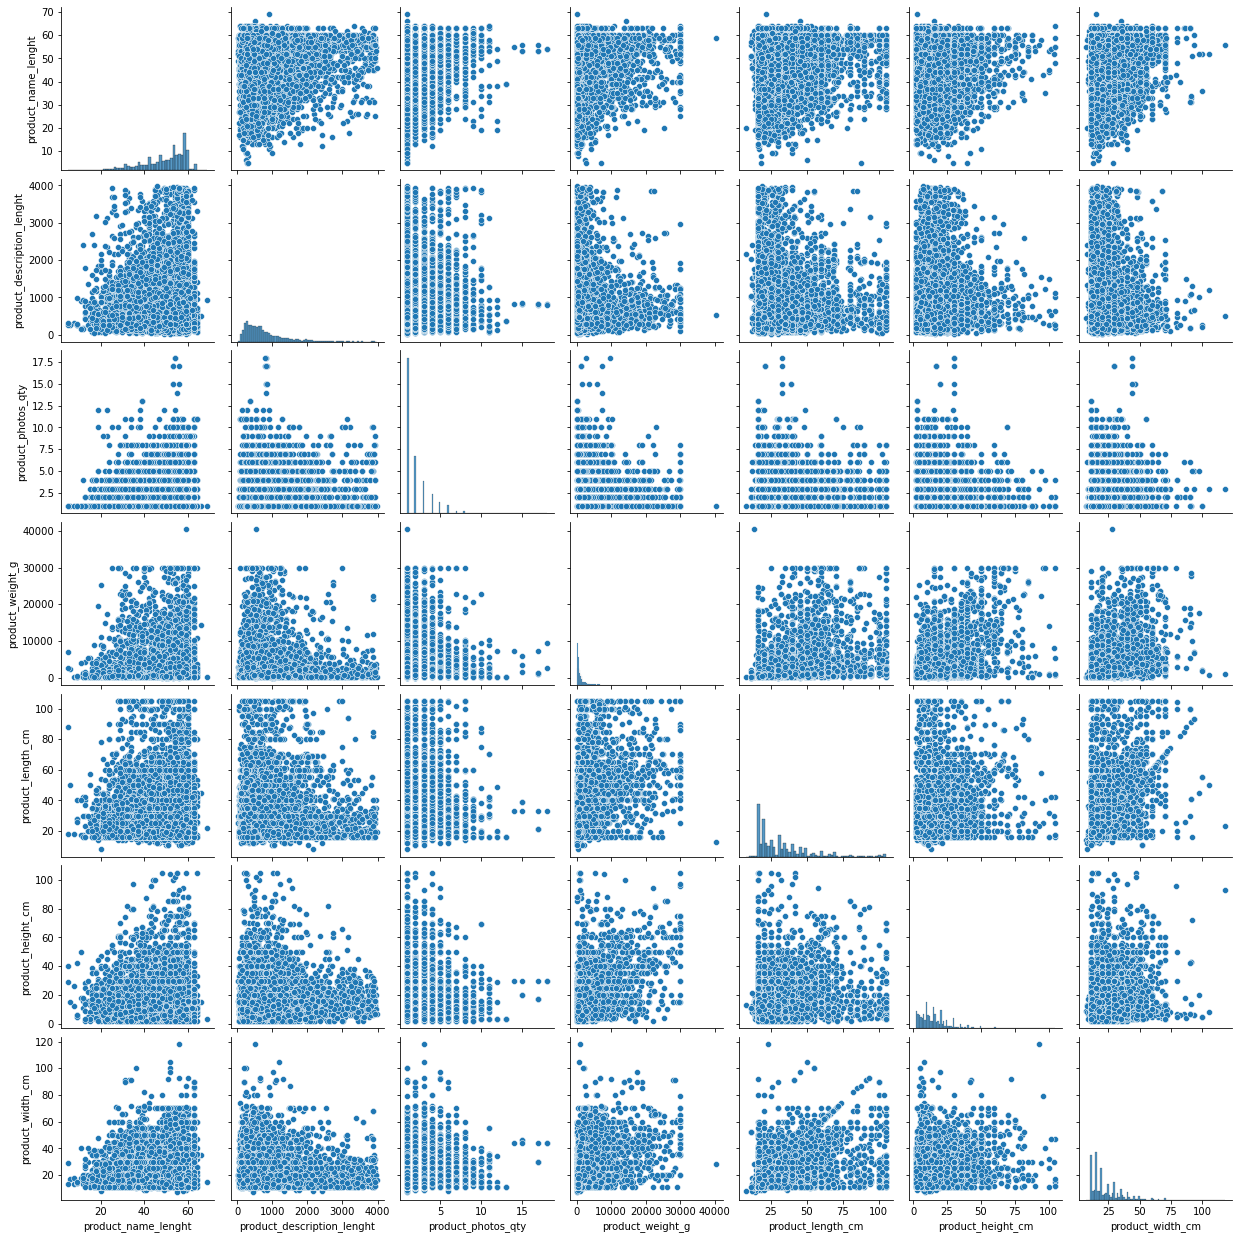

In [6]:
sns.pairplot(produtos_train)

### Dados faltantes <a id="223"></a>

Verificar dados faltantes nas bases de treino e teste é um processo importante, uma vez que todo dado é valioso, principalmente na etapa de criação de modelos de previsão. Portanto, verificou-se a porcentagem de dados faltantes por variável na base de treino e teste.

In [7]:
#Porcentagem
print(f'\n{"="*20} TREINO {"="*20} ')
print('A porcentagem de dados faltantes por variável é:')
((produtos_train.isnull().sum())/(produtos_train.shape[0]))*100


==================== TREINO ==================== 
A porcentagem de dados faltantes por variável é:


category                      0.000000
product_name_lenght           1.958333
product_description_lenght    1.866667
product_photos_qty            2.150000
product_weight_g              1.841667
product_length_cm             2.016667
product_height_cm             1.941667
product_width_cm              1.950000
dtype: float64

In [8]:
#Porcentagem
print(f'\n{"="*20} TESTE {"="*20} ')
print('A porcentagem de dados faltantes por variável é:')
((produtos_train.isnull().sum())/(produtos_train.shape[0]))*100


==================== TESTE ==================== 
A porcentagem de dados faltantes por variável é:


category                      0.000000
product_name_lenght           1.958333
product_description_lenght    1.866667
product_photos_qty            2.150000
product_weight_g              1.841667
product_length_cm             2.016667
product_height_cm             1.941667
product_width_cm              1.950000
dtype: float64

Portanto, em uma primeira análise encontra-se alguns dados faltantes para todas as variáveis, exceto a variável referente a Categoria do produto, como era esperado dado o contexto anterior. Entretanto, vale a pena afirmar que a quantidade de tais dados faltantes é baixa, certa de 1.8% de dados faltantes em média por variável.

### Preenchimento dos dados <a id="224"></a>

Como explicado anteriormente, a porcentagem de dados faltantes é baixa para cada variável. Portanto, decidiu-se utilizar o modelo SimpleImputer para fazer a imputação nos dados faltantes. A estratégia utilizada para tal foi a mediana, uma vez que essa medida não sofre com valores extremos, ou seja, outliers.

In [9]:
cols_num = produtos_train.select_dtypes(include = 'number').columns
imp = SimpleImputer(strategy = 'median', missing_values = np.nan)
imputed = imp.fit(produtos_train[cols_num])

In [10]:
produtos_train[cols_num] = imputed.transform(produtos_train[cols_num])
produtos_teste[cols_num] = imputed.transform(produtos_teste[cols_num])

In [11]:
#Porcentagem
print(f'\n{"="*20} TREINO {"="*20} ')
print('A porcentagem de dados faltantes por variável é:')
((produtos_train.isnull().sum())/(produtos_train.shape[0]))*100


==================== TREINO ==================== 
A porcentagem de dados faltantes por variável é:


category                      0.0
product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_length_cm             0.0
product_height_cm             0.0
product_width_cm              0.0
dtype: float64

In [12]:
#Porcentagem
print(f'\n{"="*20} TESTE {"="*20} ')
print('A porcentagem de dados faltantes por variável é:')
((produtos_train.isnull().sum())/(produtos_train.shape[0]))*100


==================== TESTE ==================== 
A porcentagem de dados faltantes por variável é:


category                      0.0
product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_length_cm             0.0
product_height_cm             0.0
product_width_cm              0.0
dtype: float64

### Modelagem<a id="23"></a>

Para começar a etapa de modelagem, abaixo foram separadas as variáveis entre treino e teste como solicitado, levando em consideração a previsão dos produtos presentes na variável categoria.

In [13]:
cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
            'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

X_train = produtos_train.loc[:, cols].values
y_train = produtos_train.loc[:, 'category'].ravel()


X_test = produtos_teste.loc[:, cols].values
y_test = produtos_teste.loc[:, 'category'].ravel()

### Tratamento de balanceamento de classes (SMOTE)<a id="231"></a>

Como verificou-se na etapa de visualização dos dados, o campo categoria possui classes desbalanceadas. Isto é, existem classes que aparecem com mais frequências que outras. Dessa forma, para não enviesar o modelo de previsão, aplicou-se o modelo de oversample SMOTE para balancear tais classes.

In [14]:
#SMOTE
sm = SMOTE(random_state = 19)
X_train, y_train = sm.fit_resample(X_train, y_train)

### Random Forest Classifier <a id="232"></a>

O modelo random forest **classifier** (floresta aleatória) é um modelo probabilístico de previsão para variáveis categóricas. A sua principal vantagem é a robustez em relação aos outliers e a interpretabilidade. Portanto, o modelo Random Forest pode ser simploriamente resumido em separar nossos dados baseado em uma série de perguntas.

Portanto a principal escolha por esse modelo se deu pela robustez contra dados extremos e a não necessidade de um pré-processamento de dados. Sendo assim, também não foram efetuadas etapas de normalização dos dados. 

In [15]:
#Random Forest Classifier
rf=RandomForestClassifier(
                         min_samples_split = 2,
                         min_samples_leaf = 1,
                         max_features = 'sqrt',
                         max_depth = 20
                          )

rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

Como citado no contexto desse problema, não era necessário prever todos os produtos, e sim pelo menos mais da metade deles. Dessa forma, aplicou-se o a função predict_proba() nas variáveis independentes para posteriormente encontrar as classes com mais chance de previsão na variável dependente utilizando um filtro para filtrar classes com mais chance de previsão.

- n_estimators: O número de árvores na floresta.
- min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno.
- min_samples_leaf: O número mínimo de amostras necessárias para estar em um nó folha.
- max_features: O número de recursos a serem considerados ao procurar a melhor divisão.
- max_depth: A profundidade máxima da árvore. 
- bootstrap: Se False, todo o conjunto de dados é usado para construir cada árvore.

Vale ressaltar que os paramêtros utilizados no modelo Random Forest Classifier foram encontrados por meio do modelo GridSearchCV, da qual faz uma pesquisa exaustiva sobre valores de parâmetros especificados para um estimador. (https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [16]:
#Descobrindo classes com mais chances 
prob = rf.predict_proba(X_test)
lista = [] 
for i in prob:
    lista.append(i.max())
    
maiorProb = np.array(lista)

Abaixo foi verificado se caso fosse feito um filtro para dados acima de 0.45 de chance de previsão equivaleria a pelo menos metade da base de teste.

In [17]:
len(y_test[maiorProb> 0.45])

1393

In [18]:
acuracia = accuracy_score(y_test[maiorProb> 0.45], y_pred[maiorProb> 0.45])*100

#print(f'Acurácia Random Forest Classifier: %.2f' % acuracia, '%')
print(f'Acurácia Random Forest Classifier: {acuracia:.2f}%')

Acurácia Random Forest Classifier: 82.48%


### Conclusão<a id="24"></a>

Portanto, verifica-se uma acurácia acima de 70% quando classificados pelo menos mais da metade da base de teste. Dessa forma, poderão ser classificados classes de produtos de maneira mais certeira. Sendo assim, todos os critérios de sucesso foram alcançados como solicitado pela empresa Pivitin's Company.

## Problema 02 - Resolução <a id="3"></a>

Como dito anteriormente, a empresa Pivitin's Company ainda possui mais um problema a ser resolvido. De maneira simples, será necessário uma nova funcionalidade em seu site. A funcionalidade deverá fazer uma previsão de chegada (em dias) do produto comprado. Para isso, será necessário tratar dados de entrega fora do comum. Portanto, abaixo estão mapeadas as atividades necessárias de acordo com o critério de aceite.

### Dicionário dos dados <a id="31"></a>

- **category:** categoria do produto 
- **price:** preço do produto
- **freight_value:** valor do frete 
- **customer_lat:** latitude do comprador 
- **customer_lng:** longitude do comprador 
- **seller_lat:** latitude do vendedor 
- **seller_lng:** longitude do vendedor 
- **order_status:** status final da compra 
- **order_approved_at:** data e hora da aprovação da compra 
- **order_delivered_customer_date:** data e hora de recebimento do produto pelo comprador


### Atividades Mapeadas <a id="32"></a>
- Coletar a base com os dados de pedidos citada
- Verificar dados faltantes
- Escolher o método ou modelo de tratamento dos dados
- Criar novas variáveis - feature engineering: Tempo de entrega (dias), distancia entre vendedor e cliente (km) e preço final 
- O modelo escolhido deve possuir uma R-Score ao menos de 0.4.

**Obs:** Foram disponibilzados duas planilhas com os dados, com as mesmas variáveis. A planilha de treino será utilizada para a criação e treinamento do modelo de preenchimento dos dados. Já a planilha com dados de teste será utilizada para validar a acurácia do modelo.

### Carregando os dados<a id="321"></a>

In [19]:
#treino
pedidos_train = pd.read_csv('data_orders_train.csv')

#testes
pedidos_teste = pd.read_csv('data_orders_test.csv')

A primeira etapa dessa solução se inicia por meio de uma análise exploratória, visando entender como os dados presentes nas bases de treino e teste estão distribuídos e verificando alguns pontos de alerta.

In [20]:
#Informações gerais da base de dados
pedidos_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   category                       8000 non-null   object 
 1   price                          8000 non-null   float64
 2   freight_value                  8000 non-null   float64
 3   customer_lat                   7975 non-null   float64
 4   customer_lng                   7975 non-null   float64
 5   seller_lat                     7994 non-null   float64
 6   seller_lng                     7994 non-null   float64
 7   order_status                   8000 non-null   object 
 8   order_approved_at              8000 non-null   object 
 9   order_delivered_customer_date  7853 non-null   object 
dtypes: float64(6), object(4)
memory usage: 625.1+ KB


In [21]:
#Informações gerais da base de dados
pedidos_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   category                       2000 non-null   object 
 1   price                          2000 non-null   float64
 2   freight_value                  2000 non-null   float64
 3   customer_lat                   1990 non-null   float64
 4   customer_lng                   1990 non-null   float64
 5   seller_lat                     1999 non-null   float64
 6   seller_lng                     1999 non-null   float64
 7   order_status                   2000 non-null   object 
 8   order_approved_at              2000 non-null   object 
 9   order_delivered_customer_date  1962 non-null   object 
dtypes: float64(6), object(4)
memory usage: 156.4+ KB


### Visualização dos dados <a id="322"></a>

Em relação aos dados númericos, decidiu-se verificar a dispersão entre as variáveis. Assim, é possível verificar se existem relações lineares positivas, negativas ou neutras nos dados, ajudando posteriormente a etapa de feature selection para a modelagem, bem como visualização de alguns outliers.

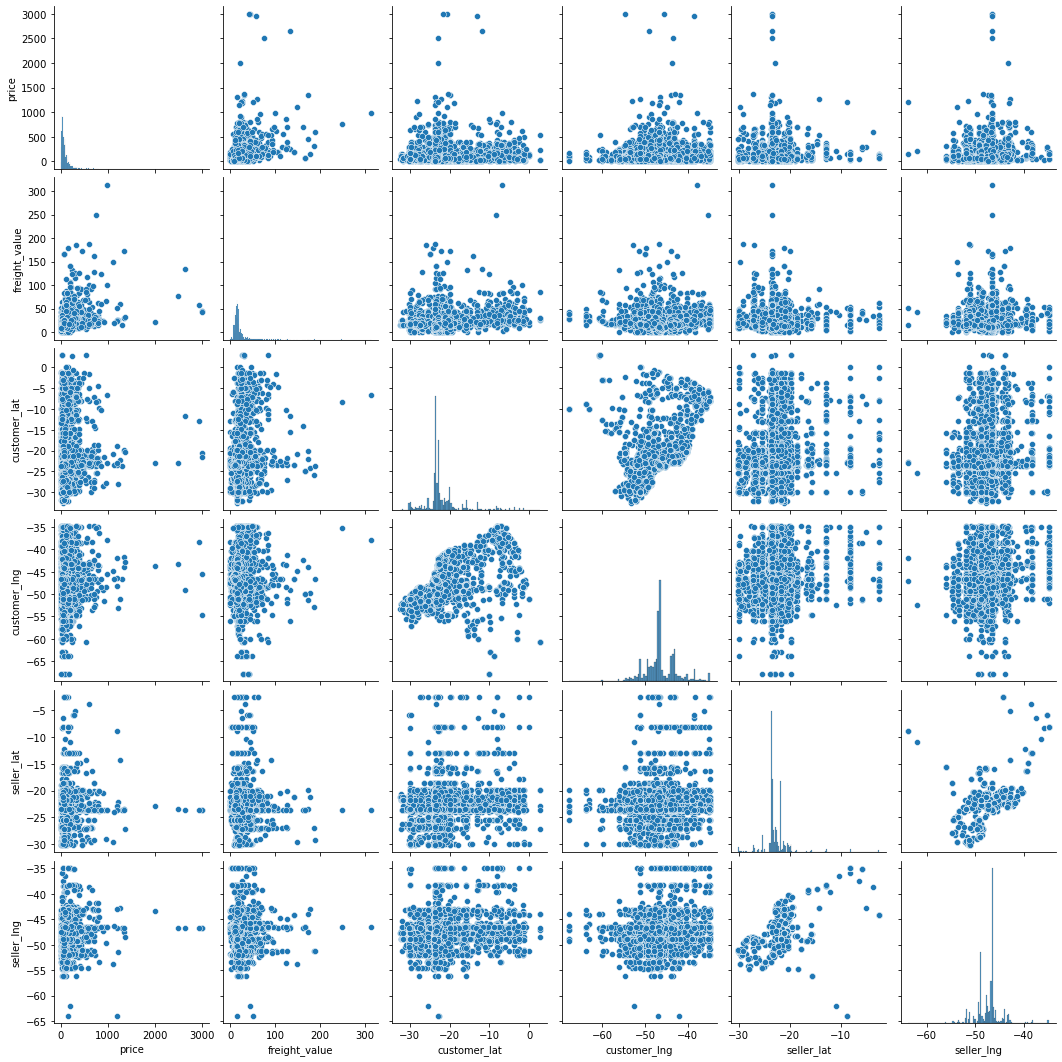

In [22]:
sns.pairplot(pedidos_train)

### Dados faltantes <a id="323"></a>

Verificar dados faltantes nas bases de treino e teste é um processo importante, uma vez que todo dado é valioso, principalmente na etapa de criação de modelos de previsão. Portanto, verificou-se a porcentagem de dados faltantes por variável na base de treino e teste.

In [23]:
#Porcentagem
print(f'\n{"="*20} TREINO {"="*20} ')
print('A porcentagem de dados faltantes por variável é:')
((pedidos_train.isnull().sum())/(pedidos_train.shape[0]))*100


==================== TREINO ==================== 
A porcentagem de dados faltantes por variável é:


category                         0.0000
price                            0.0000
freight_value                    0.0000
customer_lat                     0.3125
customer_lng                     0.3125
seller_lat                       0.0750
seller_lng                       0.0750
order_status                     0.0000
order_approved_at                0.0000
order_delivered_customer_date    1.8375
dtype: float64

In [24]:
#Porcentagem
print(f'\n{"="*20} TREINO {"="*20} ')
print('A porcentagem de dados faltantes por variável é:')
((pedidos_teste.isnull().sum())/(pedidos_teste.shape[0]))*100


==================== TREINO ==================== 
A porcentagem de dados faltantes por variável é:


category                         0.00
price                            0.00
freight_value                    0.00
customer_lat                     0.50
customer_lng                     0.50
seller_lat                       0.05
seller_lng                       0.05
order_status                     0.00
order_approved_at                0.00
order_delivered_customer_date    1.90
dtype: float64

Então, em uma primeira análise encontrou-se alguns dados faltantes para certas as variáveis. 

### Preenchimento dos dados <a id="324"></a>

Portanto, decidiu-se utilizar o modelo SimpleImputer para fazer a imputação nos dados faltantes referentes as variavéis numéricas. A estratégia utilizada para tal foi a mediana, uma vez que essa medida não sofre com valores extremos, ou seja, outliers.

In [25]:
cols_num = pedidos_train.select_dtypes(include = 'number').columns
imp = SimpleImputer(strategy = 'median', missing_values = np.nan)
imputed = imp.fit(pedidos_train[cols_num])

pedidos_train[cols_num] = imputed.transform(pedidos_train[cols_num])
pedidos_teste[cols_num] = imputed.transform(pedidos_teste[cols_num])

Em relação as variáveis categóricas que ainda existiam dados faltantes, decidiu-se pelo expurgo de tais por serem poucos dados.

In [26]:
###Treino
#Expurgo dos valores vazios (pois sao valores baixos)
pedidos_train = pedidos_train.dropna()


###Teste
#Expurgo dos valores vazios (pois sao valores baixos)
pedidos_teste = pedidos_teste.dropna()


In [27]:
#Porcentagem
print(f'\n{"="*20} TREINO {"="*20} ')
print('A porcentagem de dados faltantes por variável é:')
((pedidos_train.isnull().sum())/(pedidos_train.shape[0]))*100


==================== TREINO ==================== 
A porcentagem de dados faltantes por variável é:


category                         0.0
price                            0.0
freight_value                    0.0
customer_lat                     0.0
customer_lng                     0.0
seller_lat                       0.0
seller_lng                       0.0
order_status                     0.0
order_approved_at                0.0
order_delivered_customer_date    0.0
dtype: float64

In [28]:
#Porcentagem
print(f'\n{"="*20} TREINO {"="*20} ')
print('A porcentagem de dados faltantes por variável é:')
((pedidos_teste.isnull().sum())/(pedidos_teste.shape[0]))*100


==================== TREINO ==================== 
A porcentagem de dados faltantes por variável é:


category                         0.0
price                            0.0
freight_value                    0.0
customer_lat                     0.0
customer_lng                     0.0
seller_lat                       0.0
seller_lng                       0.0
order_status                     0.0
order_approved_at                0.0
order_delivered_customer_date    0.0
dtype: float64

### Feature Engineering <a id="33"></a>

De maneira simples, feature engineering é o processo que abrange a transformação matemática nas variáveis existentes para extrair o máximo potencial dos dados e criação de novos campos.(https://ateliware.com/blog/feature-engineering)

### Tempo de entrega (dias) <a id="331"></a>

Como foi citado no contexto, nos dados existem situações fora do comum, onde o tempo de entrega excedeu em muito a política do site. Para essa verificação, será criada uma coluna nova em dias, que apresentará quantos dias o pedido demorou até ser entregue ao cliente. 

Vale ressaltar que a Pivitin's Company está presente em diversos estados do Brasil, portanto possui uma política de que os produtos não podem demorar mais do que 20 dias para serem entregues.

#### treino

In [29]:
#Ajustando tipo dos dados de entrega para data
pedidos_train['order_delivered_customer_date'] = pd.to_datetime(pedidos_train['order_delivered_customer_date'])
pedidos_train['order_approved_at'] = pd.to_datetime(pedidos_train['order_approved_at'])


#Criando nova variável para demonstrar tempo de entrega em dias
pedidos_train['order_time_final'] = pedidos_train.order_delivered_customer_date - pedidos_train.order_approved_at
pedidos_train['order_time_final'] = pedidos_train['order_time_final'].dt.days
#pedidos_train['order_time_final'] = pedidos_train['order_time_final'].astype('int64')

#### teste

In [30]:
#Ajustando tipo dos dados de entrega para data
pedidos_teste['order_delivered_customer_date'] = pd.to_datetime(pedidos_teste['order_delivered_customer_date'])
pedidos_teste['order_approved_at'] = pd.to_datetime(pedidos_teste['order_approved_at'])


#Criando nova variável para demonstrar tempo de entrega em dias
pedidos_teste['order_time_final'] = pedidos_teste.order_delivered_customer_date - pedidos_teste.order_approved_at
pedidos_teste['order_time_final'] = pedidos_teste['order_time_final'].dt.days
#pedidos_teste['order_time_final'] = pedidos_teste['order_time_final'].astype('int64')

O gráfico abaixo tem como objetivo verificar, por meio de um histograma, a distribuição de frequência do tempo de entrega (em dias) dos produtos comprados na Pivitin's Company. Dessa forma, poderá verificar se o tempo de entrega está de acordo com a política de 20 dias da empresa.

<AxesSubplot:>

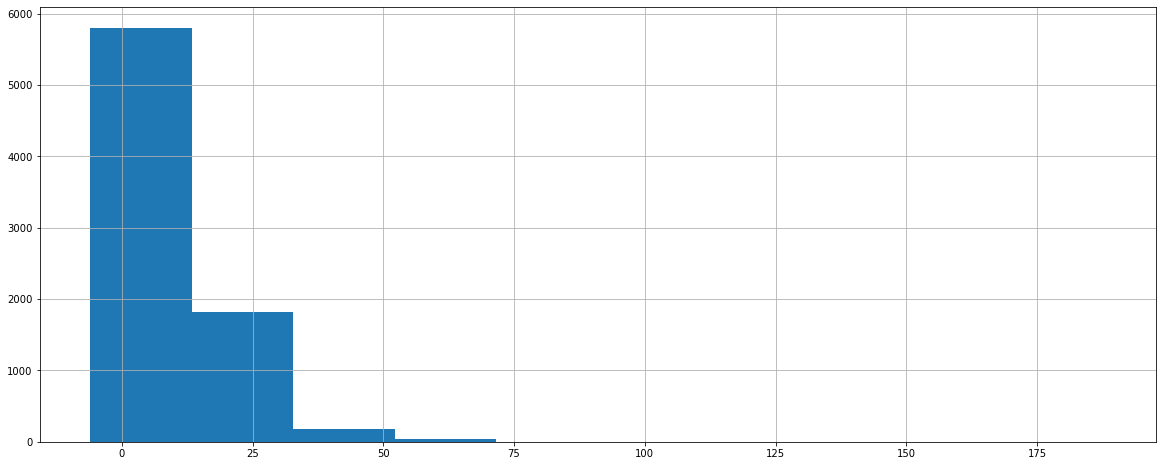

In [31]:
figure(figsize=(20,8))
pedidos_train['order_time_final'].hist()

Como demonstrado no gráfico anterior, existem pedidos que excederam a política de 20 dias da empresa, bem como pedidos com dias negativas, situação da qual é incoerente com a realidade. 

Então, para fazer a verificação de acordo com a política de 20 dias da Pivitin's Company, abaixo apresentam-se quantos pedidos com tempo de entrega maior que 20 dias, e maior ou igual a 1 dias.

In [32]:
pedidos_train[(pedidos_train['order_time_final'] > 20) | (pedidos_train['order_time_final'] < 0)].shape[0]

792

Portanto, na base de treino existem cerca de 792 pedidos entregues que excederam a política de 20 dias de entrega da Pivitin's Company. Como esse número representa apenas 1% da base de dados, decidiu por excluir tais observações para que o modelo de previsão não aprenda tais casos.

In [33]:
#Base de Treino
pedidos_train = pedidos_train[(pedidos_train['order_time_final'] <= 20) & (pedidos_train['order_time_final'] >= 1)]

#Base de Teste
pedidos_teste = pedidos_teste[(pedidos_teste['order_time_final'] <= 20) & (pedidos_teste['order_time_final'] >= 1)]

<AxesSubplot:>

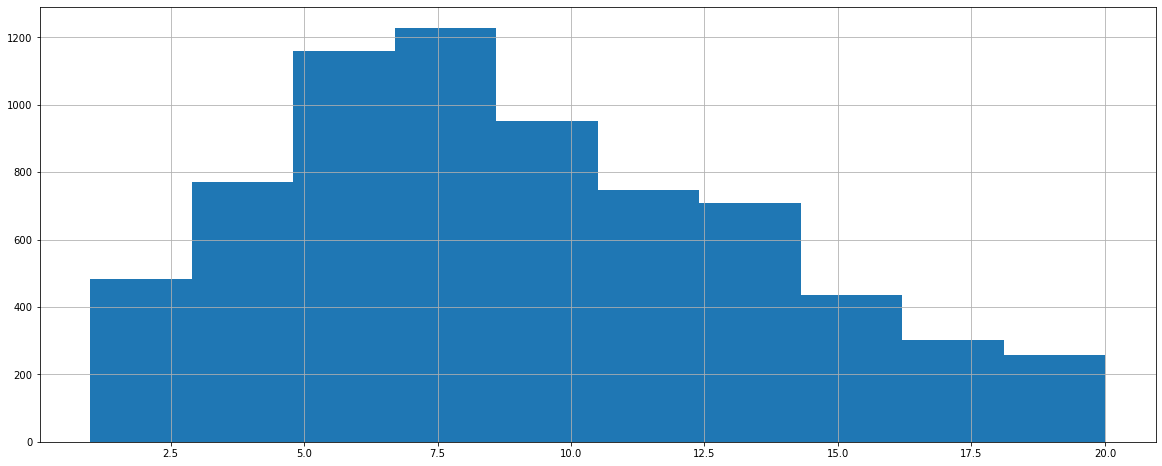

In [34]:
figure(figsize=(20,8))
pedidos_train['order_time_final'].hist()

### Distância entre vendedor e cliente (km) <a id="332"></a>

Nas bases de dados de treino e teste disponibilizadas existem dados referentes a latitude e longitude do vendedor e do cliente em cada pedido. Portanto, para verificar a distância entre o vendedor e o cliente, utilizou-se a diferença entre tais dados para calcular a distância em quilômetros.

#### Treino

In [35]:
#Distancia sera mensurada com esse ellipsoid pois de acordo com a biblioteca possui mais acuracia no metodo esférico
wgs84_geod = Geod(ellps='WGS84')

#Pegando a distancia entre dois pares de pontos com lat-long
def Distance(lat1, lon1, lat2, lon2):
  az12,az21,dist = wgs84_geod.inv(lon1, lat1, lon2, lat2) 
  return dist

#Adicionando a coluna no dataframe com a distancia em km
pedidos_train['distancia'] = Distance(
                                      (pedidos_train['seller_lat']/1000).tolist(),
                                      (pedidos_train['seller_lng']/1000).tolist(),
    
                                      (pedidos_train['customer_lat']/1000).tolist(), 
                                      (pedidos_train['customer_lng']/1000).tolist()
                                      )

pedidos_train['distancia'] = round(pedidos_train['distancia'], 2)

#### Teste

In [36]:
#Distancia sera mensurada com esse ellipsoid pois de acordo com a biblioteca possui mais acuracia no metodo esférico
wgs84_geod = Geod(ellps='WGS84')

#Pegando a distancia entre dois pares de pontos com lat-long
def Distance(lat1, lon1, lat2, lon2):
  az12,az21,dist = wgs84_geod.inv(lon1, lat1, lon2, lat2) 
  return dist


#Adicionando a coluna no dataframe com a distancia em km
pedidos_teste['distancia'] = Distance(
                                      (pedidos_teste['seller_lat']/1000).tolist(),
                                      (pedidos_teste['seller_lng']/1000).tolist(),
    
                                      (pedidos_teste['customer_lat']/1000).tolist(), 
                                      (pedidos_teste['customer_lng']/1000).tolist())

pedidos_teste['distancia'] = round(pedidos_teste['distancia'], 2)

### Preço final do produto <a id="333"></a>

Como é possível verificar nas bases de dados, há variáveis referentes ao preço do produto e ao preço do frete. Dessa forma, decidiu-se criar um novo campo do qual calcula o preço final do produto, isto é, o preço do produto mais o preço do frete.

In [37]:
#Treino
pedidos_train['valor_final'] = pedidos_train['price'] + pedidos_train['freight_value']

#Teste
pedidos_teste['valor_final'] = pedidos_teste['price'] + pedidos_teste['freight_value']

### One Hot Encoding <a id="334"></a>

A técnica de One Hot Encoding é utilizada em momentos que serão aplicados modelos de previsão que trabalham melhor com números ao invés de categorias. Consequentemente, One Hot encoding é uma transformação nos dados para representar uma variável categórica nominal de forma binária (indica presença ou ausência de um valor. Dessa forma, abaixo é aplicada a transformação das categórias e status em valores binários visando a utilização de tais variáveis no modelo de previsão.

In [38]:
#Treino
pedidos_train = pd.get_dummies(pedidos_train, columns = ['category'])
pedidos_train = pd.get_dummies(pedidos_train, columns = ['order_status'])

#Teste
pedidos_teste = pd.get_dummies(pedidos_teste, columns = ['category'])
pedidos_teste = pd.get_dummies(pedidos_teste, columns = ['order_status'])

### Modelagem<a id="34"></a>

Para começar a etapa de modelagem, foram separadas as variáveis entre treino e teste como solicitado.

Abaixo foi proposta uma breve visualização das correlações entre as variáveis presentes na base de treino, visualização da qual possa ajudar na etapa de feature selection, isto é, selecionar as variáveis para o modelo de previsão.

<AxesSubplot:>

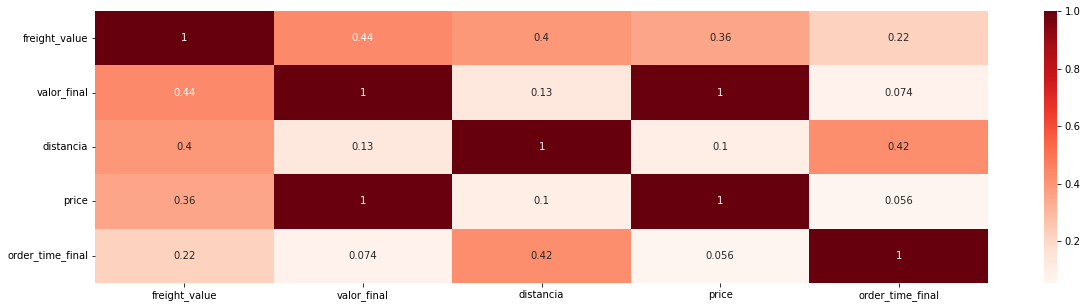

In [39]:
figure(figsize=(20,5))
sns.heatmap(pedidos_train[['freight_value','valor_final','distancia',
                           'price', 'order_time_final']].corr(), annot = True, cmap="Reds")

As variáveis escolhidas para prever o tempo de entrega em dias foram as que apresentaram maior relação linear, ou seja: Valor do frete, valor final do produto e a distância entre o vendedor e cliente. Também foram utilizadas as variáveis após o One Hot Encoding. A variável price não foi selecionada por conta da correlação com o campo valor final.

In [40]:
cols =  ['freight_value','valor_final', 'distancia',
        
         #Vars com one hot encoding
         'category_alimentos_bebidas',
         'category_automotivo',
         'category_beleza_saude',
         'category_brinquedos',
         'category_cama_mesa_banho',
         'category_esporte_lazer',
         'category_informatica_acessorios',
         'category_moveis_decoracao',
         'category_pet_shop',
         'category_telefonia', 
         'order_status_delivered',
         'order_status_delivered']

X_train = pedidos_train.loc[:, cols].values
y_train = pedidos_train.loc[:, 'order_time_final'].ravel()

X_test = pedidos_teste.loc[:, cols].values
y_test = pedidos_teste.loc[:, 'order_time_final'].ravel()

### Normalização dos dados (StandardScaler)<a id="341"></a>

Como era de se imaginar, cada variável numérica possui sua medida. Portanto, faz-se uma normalização dos dados para que, de maneira simples, todas as variáveis possuam uma medida em comum pois cada observação é subtraída da média e dividida pelo desvio padrão.

In [41]:
#Normalização dos dados
ss = StandardScaler()
X_stand_train = ss.fit_transform(X_train)
X_stand_test = ss.transform(X_test)

### Random Forest Regressor <a id="342"></a>

O modelo random forest **regressor** (floresta aleatória) é um modelo probabilístico de previsão para variáveis numéricas. A sua principal vantagem é a robustez em relação aos outliers e a interpretabilidade. Portanto, o modelo Random Forest pode ser simploriamente resumido em separar nossos dados baseado em uma série de perguntas que, nesse caso, leve em consideração intervalos numéricos.

Portanto a principal escolha por esse modelo se deu pela robustez contra dados extremos e a não necessidade de um pré-processamento de dados.

In [42]:
#RandomForestRegressor
regressor = RandomForestRegressor(
                                  bootstrap = False,
                                  max_depth = 100,
                                  max_features = 'sqrt',
                                  min_samples_leaf = 3,
                                  min_samples_split = 8,
                                  n_estimators = 200,
                                  random_state = 41)

#padronizado zscore
regressor.fit(X_stand_train, y_train)
y_pred = regressor.predict(X_stand_test)

#regressor.fit(X_train, y_train)
#y_pred = regressor.predict(X_test)

#R2
score_stand = regressor.score(X_stand_test, y_test) #zscore
#score_stand = regressor.score(X_test, y_test)

#Coeficientes de regresao
#print('R2 Random Forest Regressor: %.2f' % score_stand)
print(f'R2 Random Forest Regressor: {score_stand:.2f}')

R2 Random Forest Regressor: 0.40


- n_estimators: O número de árvores na floresta.
- min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno.
- min_samples_leaf: O número mínimo de amostras necessárias para estar em um nó folha.
- max_features: O número de recursos a serem considerados ao procurar a melhor divisão.
- max_depth: A profundidade máxima da árvore. 
- bootstrap: Se False, todo o conjunto de dados é usado para construir cada árvore.

Vale ressaltar que os paramêtros utilizados no modelo Random Forest Regressor foram encontrados por meio do modelo GridSearchCV, da qual faz uma pesquisa exaustiva sobre valores de parâmetros especificados para um estimador.(https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

### Conclusão <a id="35"></a>

Portanto, verifica-se que a medida R2 encontrada pelo modelo random forest foi de pelo menos 0.4. Dessa forma, poderá ser implementado no chat um modelo de previsão de entrega em dias. Sendo assim, todos os critérios de sucesso foram alcançados como solicitado pela empresa Pivitin's Company.

<p>

<p>

@Pivitin's Company™ <br>
Maio, 2022